In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# !pip install tensorboardcolab

In [2]:
import h5py
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_raw = loadmat('train_32x32.mat')
test_raw = loadmat('test_32x32.mat')


In [4]:
train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [5]:
train_images.shape

(32, 32, 3, 73257)

In [6]:
test_images.shape

(32, 32, 3, 26032)

In [7]:
train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

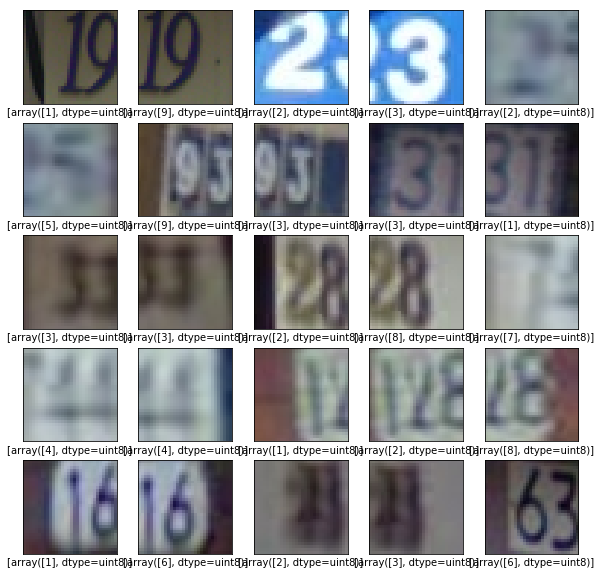

In [8]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel([train_labels[i]])
plt.show()

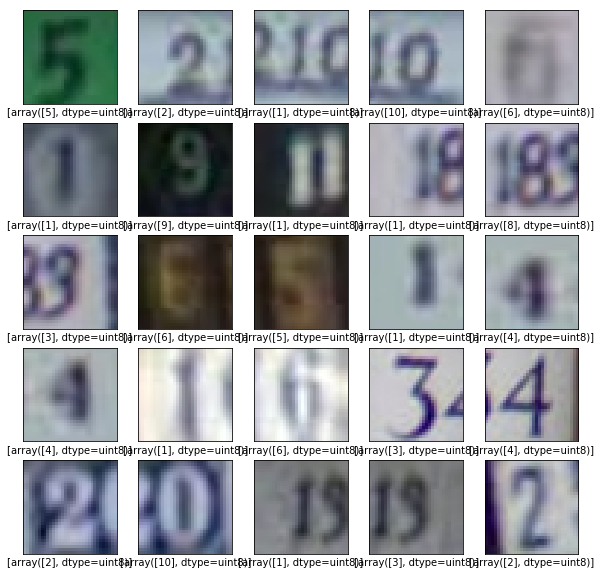

In [9]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap= plt.cm.binary)
    plt.xlabel([test_labels[i]])
plt.show()

In [10]:
x_train = train_images
y_train = train_labels
x_test = test_images
y_test =test_labels

In [11]:
x_train.shape,y_test.shape

((73257, 32, 32, 3), (26032, 1))

In [12]:
img_rows,img_cols = 32,32

input_shape = (img_rows, img_cols, 3)

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [14]:
x_train.shape

(73257, 32, 32, 3)

In [15]:
x_train.max()

1.0

In [16]:
batch_size = 128
num_classes = 10
epochs = 12

In [17]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [18]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [19]:
x_train.shape

(73257, 32, 32, 3)

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.15, random_state=22)

In [21]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((62268, 32, 32, 3), (10989, 32, 32, 3), (62268, 10), (10989, 10))

In [ ]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [26]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = input_shape),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',padding='same'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(128,(3,3),activation = 'relu',padding='same'),
                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(10,activation='softmax')
                              ])

In [27]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
from time import time
from tensorflow.keras.callbacks import TensorBoard

In [91]:
tensorboard = TensorBoard(log_dir=".logs/{}".format(time()))

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001,patience=10)


In [30]:
model.fit(x_train,y_train,
         batch_size=batch_size,
         verbose=1,epochs = epochs,
         validation_data=(x_val,y_val),
         callbacks = [early_stopping])

Train on 62268 samples, validate on 10989 samples
Epoch 1/12
62268/62268 [==============================] - 408s 7ms/sample - loss: 1.3119 - acc: 0.5581 - val_loss: 0.7712 - val_acc: 0.7618
Epoch 2/12
62268/62268 [==============================] - 352s 6ms/sample - loss: 0.5506 - acc: 0.8366 - val_loss: 0.4361 - val_acc: 0.8643
Epoch 3/12
62268/62268 [==============================] - 351s 6ms/sample - loss: 0.4349 - acc: 0.8736 - val_loss: 0.3043 - val_acc: 0.9104
Epoch 4/12
62268/62268 [==============================] - 346s 6ms/sample - loss: 0.3833 - acc: 0.8887 - val_loss: 0.3158 - val_acc: 0.9082
Epoch 5/12
62268/62268 [==============================] - 339s 5ms/sample - loss: 0.3479 - acc: 0.8995 - val_loss: 0.3547 - val_acc: 0.8917
Epoch 6/12
62268/62268 [==============================] - 365s 6ms/sample - loss: 0.3229 - acc: 0.9077 - val_loss: 0.2870 - val_acc: 0.9177
Epoch 7/12
62268/62268 [==============================] - 412s 7ms/sample - loss: 0.3016 - acc: 0.9134 - val_l